In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import utils

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from toeplitzlda.classification import ToeplitzLDA
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

import mplcyberpunk as cbp


plt.style.use("cyberpunk")

mne.set_log_level(verbose="ERROR")

In [2]:
# preload data
dataset = {}
for sub in range(1,7):
    dataset[sub] = {}
    for ses in range(1,3):
        sesdata = utils.load_preprocess_matlab_data(f"data/sub0{sub}_ses{ses}.mat")
        dataset[sub][ses] = sesdata

loading file data/sub01_ses1.mat
loading file data/sub01_ses2.mat
loading file data/sub02_ses1.mat
loading file data/sub02_ses2.mat
loading file data/sub03_ses1.mat
loading file data/sub03_ses2.mat
loading file data/sub04_ses1.mat
loading file data/sub04_ses2.mat
loading file data/sub05_ses1.mat
loading file data/sub05_ses2.mat
loading file data/sub06_ses1.mat
loading file data/sub06_ses2.mat


# Time window [0.2 - 0.7]s from Yasemin et al

## FCz, Cz

In [12]:
f1_slda = []
f1_tlda = []
for sub in range(1,7):
    ses1 = dataset[sub][1]
    ses2 = dataset[sub][2]
    
    Xtrain, ytrain = utils.epochs_to_data_labels(ses1)
    Xtest, ytest = utils.epochs_to_data_labels(ses2)

    slda = LDA(solver='lsqr', shrinkage='auto')
    slda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_slda = slda.predict(Xtest.reshape(Xtest.shape[0], -1))

    tlda = ToeplitzLDA(n_channels=2)
    tlda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_tlda = tlda.predict(Xtest.reshape(Xtest.shape[0], -1))

    # calculate f1 scores using sklearn
    f1_sl = f1_score(ytest, y_pred_slda, pos_label=1)
    f1_tl = f1_score(ytest, y_pred_tlda, pos_label=1)
    f1_slda.append(f1_sl)
    f1_tlda.append(f1_tl)
    

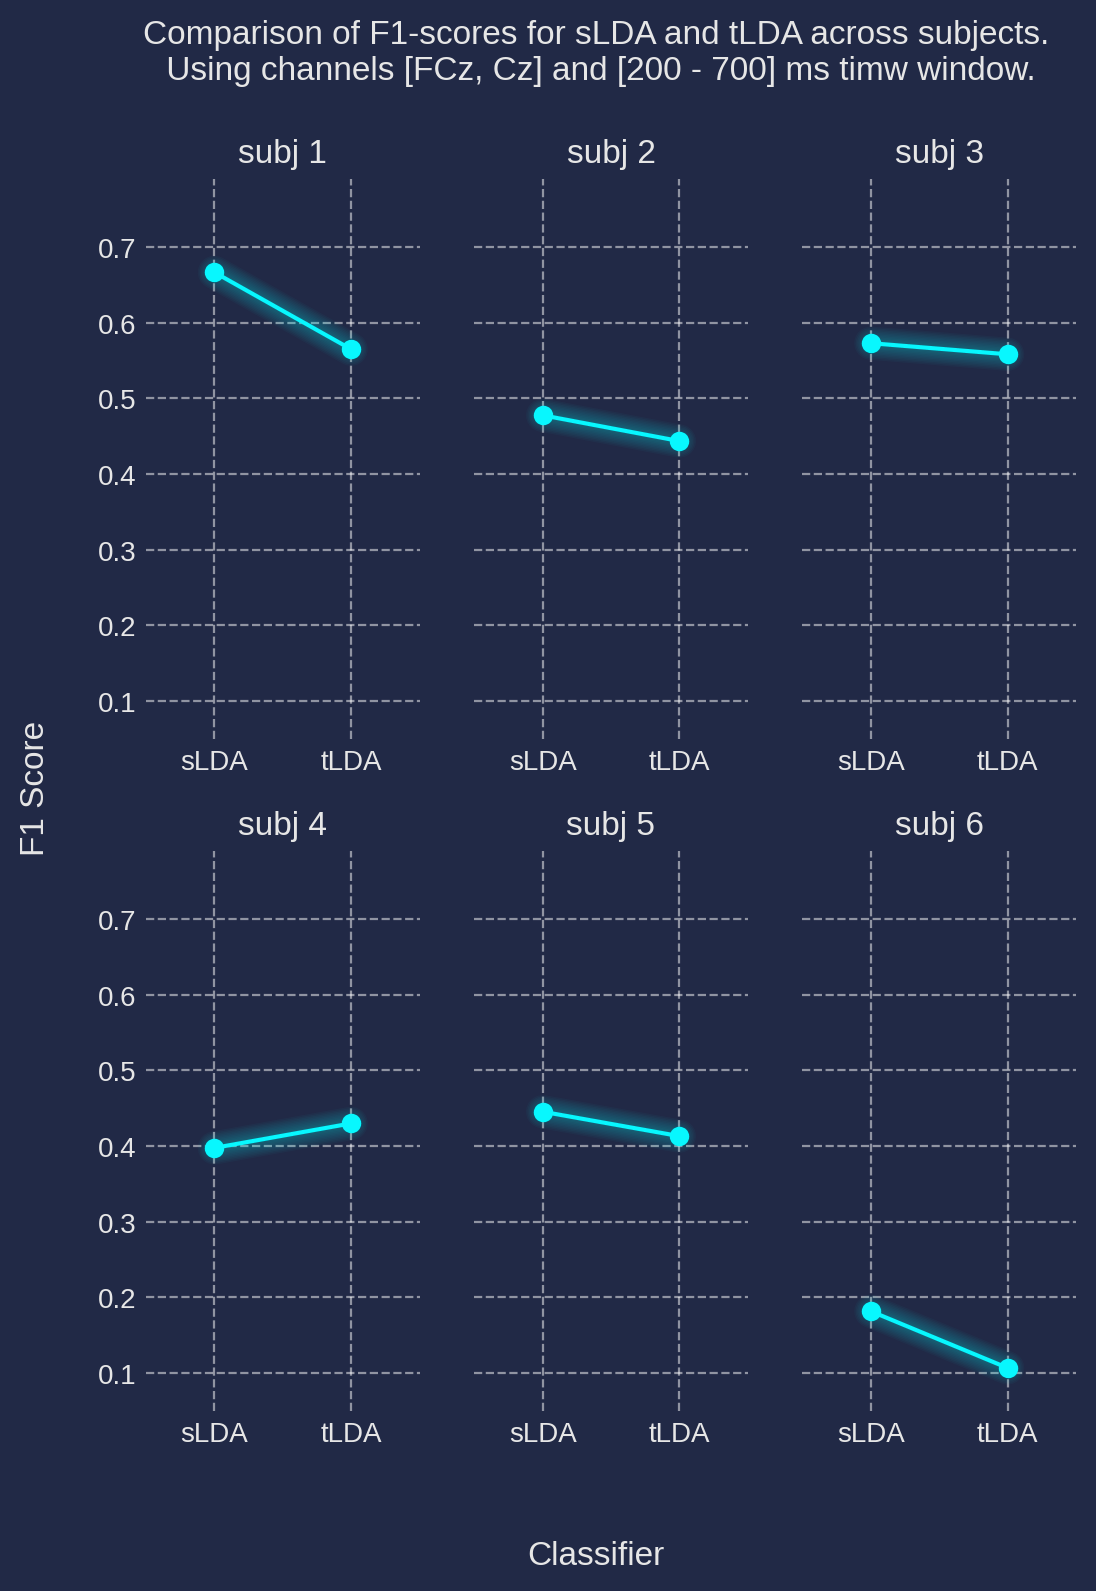

0.4570757971954997 0.4195390274183812


In [ ]:
# plot the f1 scores for all subjects
fig, ax = plt.subplots(2,3, figsize=(6, 8), sharey=True, dpi=200)
# shared x-axis for all subplots
plt.subplot(2,3,1)
fig.supylabel('F1 Score')
for i, (s, t) in enumerate(zip(f1_slda, f1_tlda)):
    
    plt.subplot(2,3,i+1)
    plt.plot([s, t], marker='o', label=f'subj {s}')
    plt.xticks([0, 1], ['sLDA', 'tLDA'])
    plt.xlim(-0.5, 1.5)
    plt.title(f'subj {i+1}')
    cbp.make_lines_glow()
    plt.grid(c='w', alpha=0.5, linestyle='--')
    plt.ylim(0.05, 0.79)
# fig.supylabel('F1 Score')
fig.supxlabel('Classifier')
# plt.legend()
plt.suptitle('Comparison of F1-scores for sLDA and tLDA across subjects.\n Using channels [FCz, Cz] and [200 - 700] ms timw window.')
# shared x-axis for all subplots

plt.savefig('figs/f1_scores.png', dpi=200, bbox_inches='tight')
plt.show()

print(np.mean(f1_slda), np.mean(f1_tlda))

In [7]:
# wilcoxon test
from scipy.stats import wilcoxon
stat, p = wilcoxon(f1_slda, f1_tlda)
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')

Wilcoxon test statistic: 3.0, p-value: 0.15625


## all channels

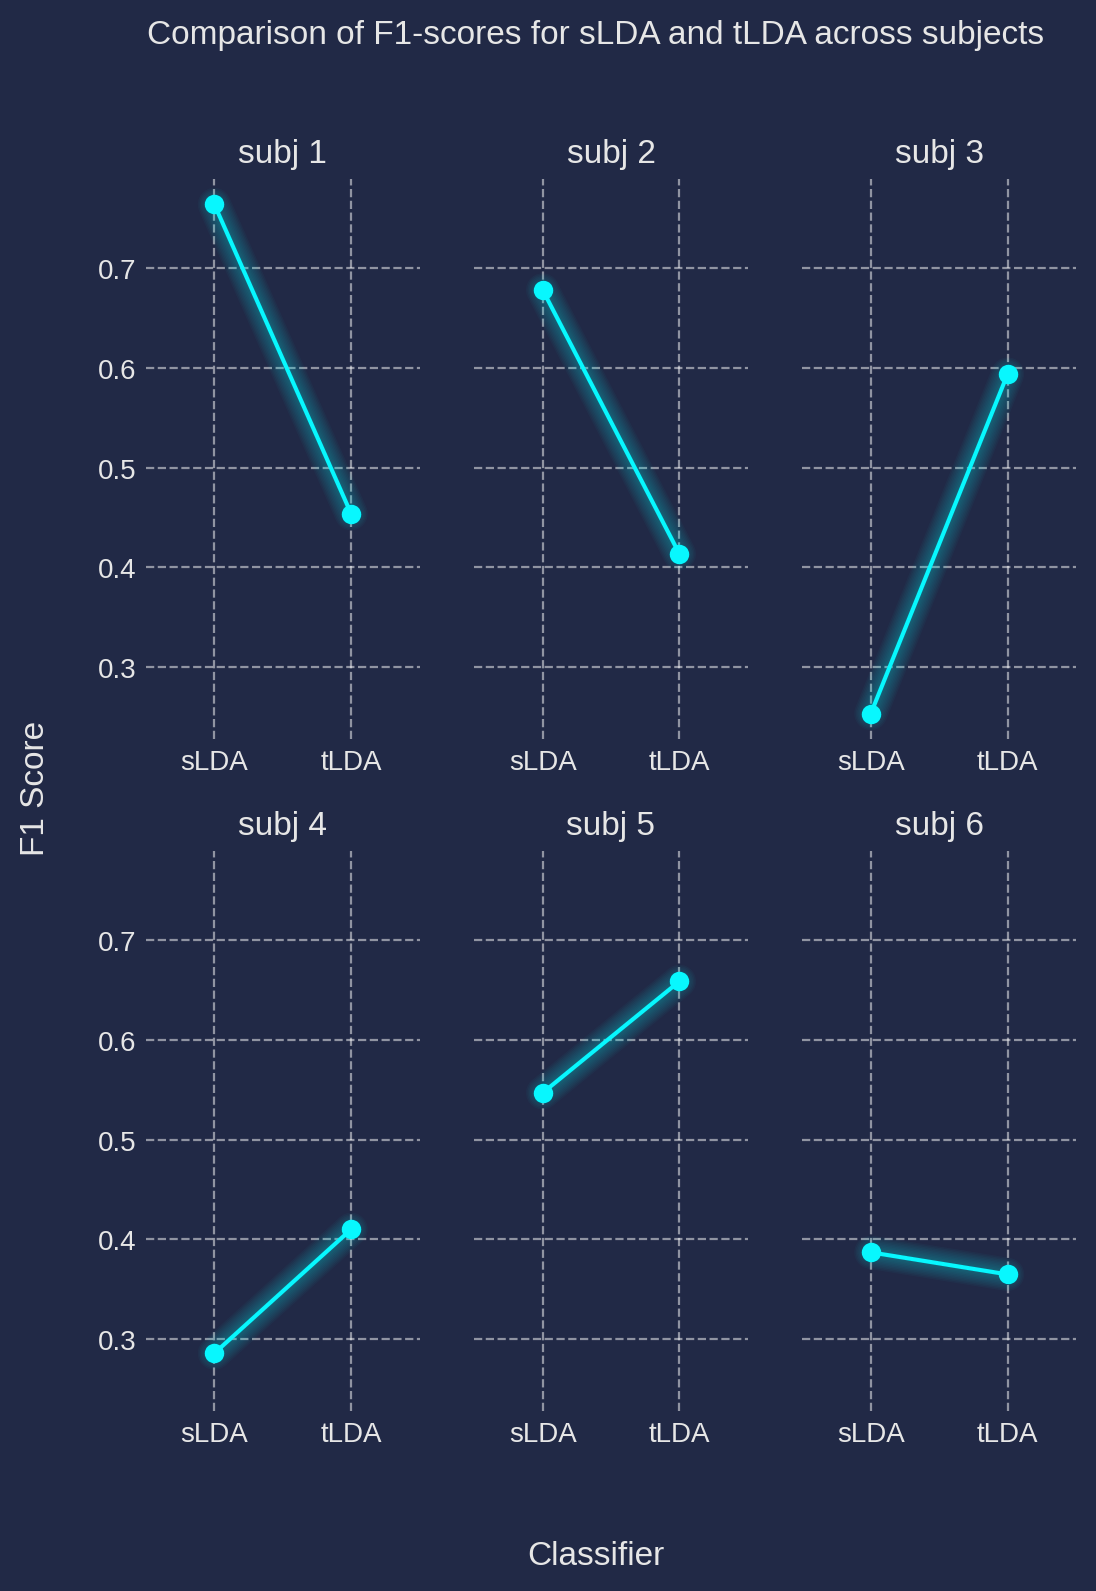

0.4858335946787738 0.4824305575995351


In [ ]:
f1_slda = []
f1_tlda = []
for sub in range(1,7):
    ses1 = dataset[sub][1]
    ses2 = dataset[sub][2]
    
    Xtrain, ytrain = utils.epochs_to_data_labels(ses1, picks='all', tmin=0.05, tmax=0.85)
    Xtest, ytest = utils.epochs_to_data_labels(ses2, picks='all', tmin=0.05, tmax=0.85)

    slda = LDA(solver='lsqr', shrinkage='auto')
    slda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_slda = slda.predict(Xtest.reshape(Xtest.shape[0], -1))

    tlda = ToeplitzLDA(n_channels=2)
    tlda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_tlda = tlda.predict(Xtest.reshape(Xtest.shape[0], -1))

    # calculate f1 scores using sklearn
    f1_sl = f1_score(ytest, y_pred_slda, pos_label=1)
    f1_tl = f1_score(ytest, y_pred_tlda, pos_label=1)
    f1_slda.append(f1_sl)
    f1_tlda.append(f1_tl)

# plot the f1 scores for all subjects
fig, ax = plt.subplots(2,3, figsize=(6, 8), sharey=True, dpi=200)
# shared x-axis for all subplots
plt.subplot(2,3,1)
fig.supylabel('F1 Score')
for i, (s, t) in enumerate(zip(f1_slda, f1_tlda)):
    
    plt.subplot(2,3,i+1)
    plt.plot([s, t], marker='o', label=f'subj {s}')
    plt.xticks([0, 1], ['sLDA', 'tLDA'])
    plt.xlim(-0.5, 1.5)
    plt.title(f'subj {i+1}')
    cbp.make_lines_glow()
    plt.grid(c='w', alpha=0.5, linestyle='--')

# fig.supylabel('F1 Score')
fig.supxlabel('Classifier')
# plt.legend()
plt.suptitle('Comparison of F1-scores for sLDA and tLDA across subjects')
# shared x-axis for all subplots

# plt.savefig('f1_scores.png', dpi=200, bbox_inches='tight')
plt.show()

print(np.mean(f1_slda), np.mean(f1_tlda))

# Use chavarriaga's time windows

## only FCz and Cz

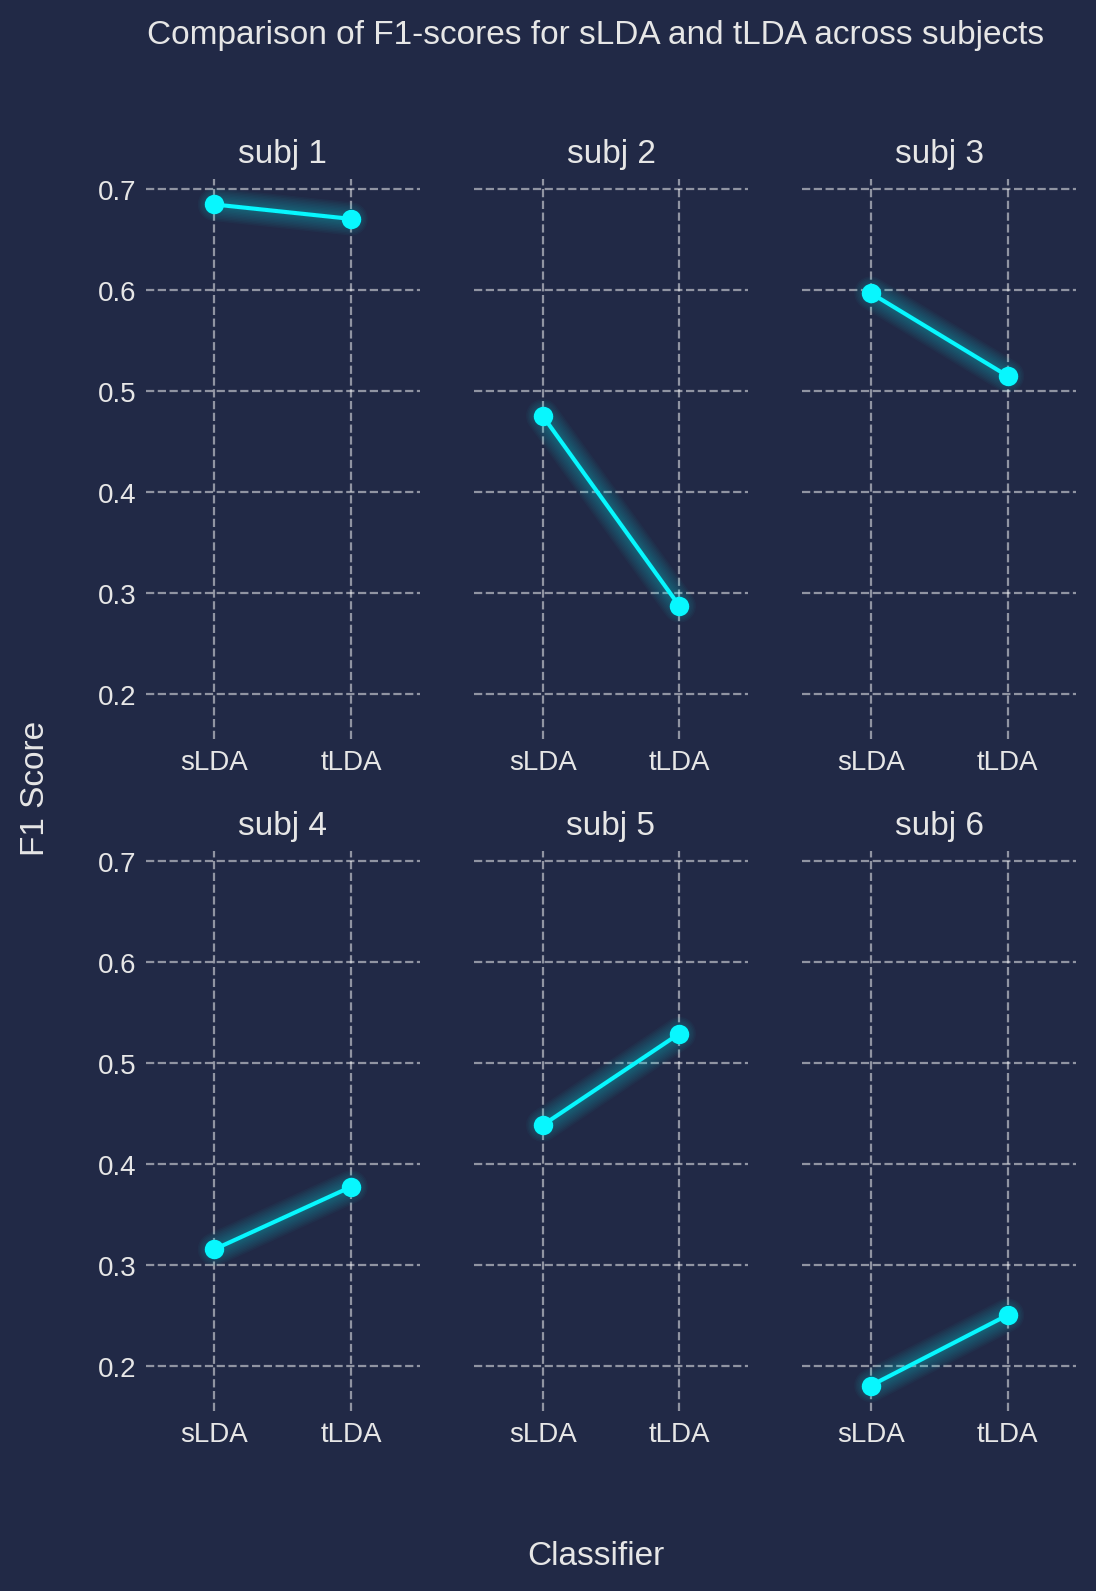

0.4482903527427415 0.43790150951065915


In [ ]:
f1_slda = []
f1_tlda = []

timewindows ={
    1: (0.2, 0.45),
    2: (0.15, 0.6),
    3: (0.2, 0.45),
    4: (0.0, 0.6),
    5: (0.16, 0.6),
    6: (0.15, 0.6),
}

for sub in range(1,7):
    ses1 = dataset[sub][1]
    ses2 = dataset[sub][2]
    
    tmin = timewindows[sub][0]
    tmax = timewindows[sub][1]
    
    Xtrain, ytrain = utils.epochs_to_data_labels(ses1, picks=['FCz', 'Cz'], tmin=tmin, tmax=tmax)
    Xtest, ytest = utils.epochs_to_data_labels(ses2, picks=['FCz', 'Cz'], tmin=tmin, tmax=tmax)

    slda = LDA(solver='lsqr', shrinkage='auto')
    slda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_slda = slda.predict(Xtest.reshape(Xtest.shape[0], -1))

    tlda = ToeplitzLDA(n_channels=2)
    tlda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_tlda = tlda.predict(Xtest.reshape(Xtest.shape[0], -1))

    # calculate f1 scores using sklearn
    f1_sl = f1_score(ytest, y_pred_slda, pos_label=1)
    f1_tl = f1_score(ytest, y_pred_tlda, pos_label=1)
    f1_slda.append(f1_sl)
    f1_tlda.append(f1_tl)

# plot the f1 scores for all subjects
fig, ax = plt.subplots(2,3, figsize=(6, 8), sharey=True, dpi=200)
# shared x-axis for all subplots
plt.subplot(2,3,1)
fig.supylabel('F1 Score')
for i, (s, t) in enumerate(zip(f1_slda, f1_tlda)):
    
    plt.subplot(2,3,i+1)
    plt.plot([s, t], marker='o', label=f'subj {s}')
    plt.xticks([0, 1], ['sLDA', 'tLDA'])
    plt.xlim(-0.5, 1.5)
    plt.title(f'subj {i+1}')
    cbp.make_lines_glow()
    plt.grid(c='w', alpha=0.5, linestyle='--')

# fig.supylabel('F1 Score')
fig.supxlabel('Classifier')
# plt.legend()
plt.suptitle('Comparison of F1-scores for sLDA and tLDA across subjects')
# shared x-axis for all subplots

# plt.savefig('f1_scores.png', dpi=200, bbox_inches='tight')
plt.show()

print(np.mean(f1_slda), np.mean(f1_tlda))

## all channels

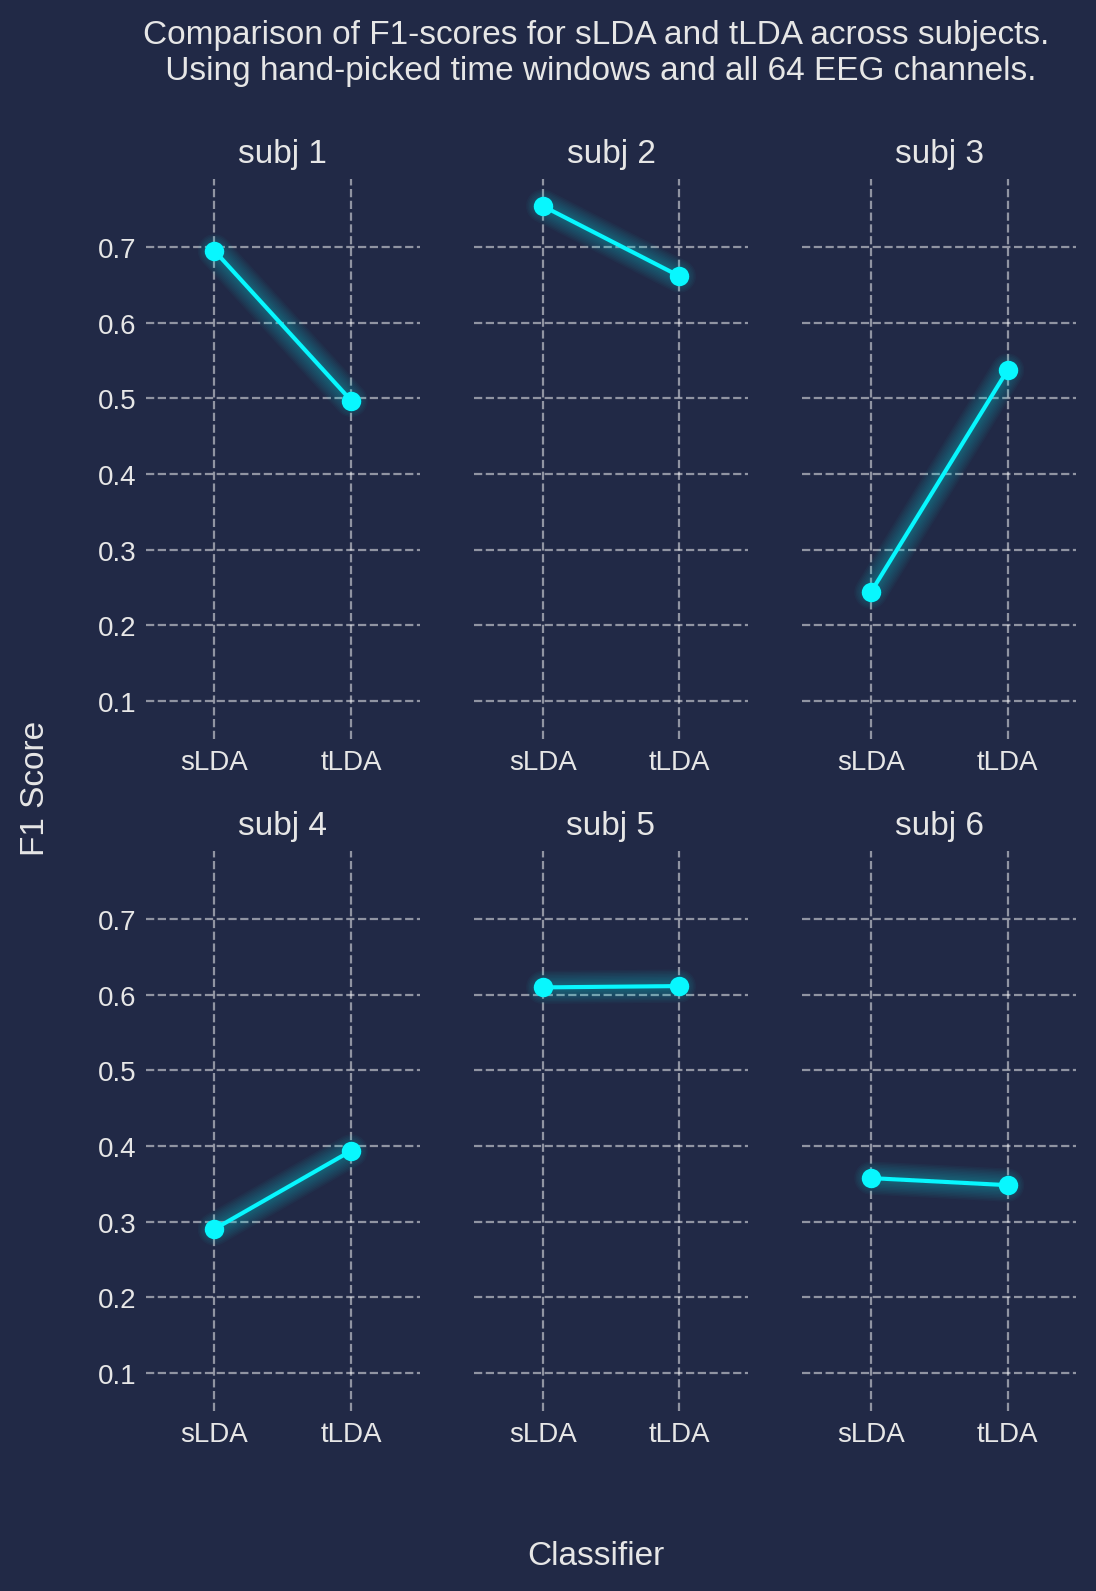

0.49190866403275163 0.5083727571590401


In [ ]:

f1_slda = []
f1_tlda = []

timewindows ={
    1: (0.2, 0.45),
    2: (0.15, 0.6),
    3: (0.2, 0.45),
    4: (0.0, 0.6),
    5: (0.16, 0.6),
    6: (0.15, 0.6),
}

for sub in range(1,7):
    ses1 = dataset[sub][1]
    ses2 = dataset[sub][2]
    
    tmin = timewindows[sub][0]
    tmax = timewindows[sub][1]
    
    Xtrain, ytrain = utils.epochs_to_data_labels(ses1, picks='all', tmin=tmin, tmax=tmax)
    Xtest, ytest = utils.epochs_to_data_labels(ses2, picks='all', tmin=tmin, tmax=tmax)

    slda = LDA(solver='lsqr', shrinkage='auto')
    slda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_slda = slda.predict(Xtest.reshape(Xtest.shape[0], -1))

    tlda = ToeplitzLDA(n_channels=2)
    tlda.fit(Xtrain.reshape(Xtrain.shape[0], -1), ytrain)
    y_pred_tlda = tlda.predict(Xtest.reshape(Xtest.shape[0], -1))

    # calculate f1 scores using sklearn
    f1_sl = f1_score(ytest, y_pred_slda, pos_label=1)
    f1_tl = f1_score(ytest, y_pred_tlda, pos_label=1)
    f1_slda.append(f1_sl)
    f1_tlda.append(f1_tl)

# plot the f1 scores for all subjects
fig, ax = plt.subplots(2,3, figsize=(6, 8), sharey=True, dpi=200)
# shared x-axis for all subplots
plt.subplot(2,3,1)
fig.supylabel('F1 Score')
for i, (s, t) in enumerate(zip(f1_slda, f1_tlda)):
    
    plt.subplot(2,3,i+1)
    plt.plot([s, t], marker='o', label=f'subj {s}')
    plt.xticks([0, 1], ['sLDA', 'tLDA'])
    plt.xlim(-0.5, 1.5)
    plt.title(f'subj {i+1}')
    cbp.make_lines_glow()
    plt.grid(c='w', alpha=0.5, linestyle='--')
    plt.ylim(0.05, 0.79)

# fig.supylabel('F1 Score')
fig.supxlabel('Classifier')
# plt.legend()
plt.suptitle('Comparison of F1-scores for sLDA and tLDA across subjects.\n Using hand-picked time windows and all 64 EEG channels.')
# shared x-axis for all subplots

plt.savefig('figs/f1_scores_moredata.png', dpi=200, bbox_inches='tight')
plt.show()

print(np.mean(f1_slda), np.mean(f1_tlda))

In [4]:
# wilcoxon test
from scipy.stats import wilcoxon
stat, p = wilcoxon(f1_slda, f1_tlda)
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')

Wilcoxon test statistic: 10.0, p-value: 1.0
